<a href="https://colab.research.google.com/github/lari-guimaraes/Projetos-portf-lio/blob/main/Departamento_de_Marketing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## ATRIBUTOS

  #CUSTID: Identificação do cliente
  #BALANCE: Saldo para fazer compras
  #BALANCE_FREQUENCY: frequência que o saldo é atualizado (1=frequente, 0=não frequente)
  #PURCHASES: Quantidade de compras realizadas
  #ONEOFFPURCHASES: Quantidade de compras feitas "de uma só vez" (sem parcelar)
  #INSTALLMENTS_PURCHASES: Quantidade de compras parceladas
  #CASH_ADVANCE: Dinheiro adiantado
  #PURCHASES_FREQUENCY: Frequência das compras (entre 1 e 0)
  #ONEOFF_PURCHASES_FREQUENCY: Frequência de compras à vista (entre 1 e 0)
  #PURCHASES_INSTALLMENTS_FREQUENCY: Frequência de compras parceladas (entre 1 e 0)
  #CASH_ADVANCE_FREQUENCY: Frequência de saques de dinheiro adiantado
  #CASH_ADVANCE_TRX: Número de transações feitas como "Cash in Advance"
  #PURCHASES_TRX: Número de compras
  #CREDIT_LIMIT: Limite do cartão de crédito
  #PAYMENTS: Valor pago
  #MINIMUM_PAYMENTS: Valor mínimo pago
  #PRC_FULL_PAYMENT: Percentual de pagamentos da fatura 'completa'
  #TENURE: Posse do titular do cartão

## Importação das bibliotecas e base de dados

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

In [2]:
creditcard_df = pd.read_csv('/content/drive/MyDrive/Ciência de Dados para Empresas e Negócios/Bases de dados/Marketing_data.csv')
creditcard_df.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [3]:
creditcard_df.shape

(8950, 18)

In [4]:
creditcard_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [5]:
creditcard_df.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


In [6]:
creditcard_df[creditcard_df['ONEOFF_PURCHASES'] == 40761.250000]

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
550,C10574,11547.52001,1.0,49039.57,40761.25,8278.32,558.166886,1.0,1.0,0.916667,0.083333,1,101,22500.0,46930.59824,2974.069421,0.25,12


In [7]:
creditcard_df['CASH_ADVANCE'].max()

47137.21176

In [8]:
creditcard_df[creditcard_df['CASH_ADVANCE'] == 47137.21176]

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
2159,C12226,10905.05381,1.0,431.93,133.5,298.43,47137.21176,0.583333,0.25,0.5,1.0,123,21,19600.0,39048.59762,5394.173671,0.0,12


## Visualização e exploração dos dados

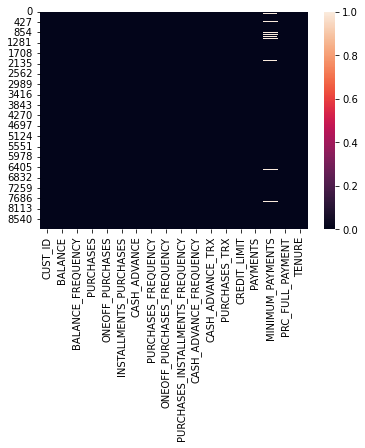

In [9]:
sns.heatmap(creditcard_df.isnull());

In [10]:
creditcard_df.isnull().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

In [11]:
creditcard_df.loc[(creditcard_df['MINIMUM_PAYMENTS'].isnull() == True), 'MINIMUM_PAYMENTS'] = creditcard_df['MINIMUM_PAYMENTS'].mean()

In [12]:
creditcard_df.loc[(creditcard_df['CREDIT_LIMIT'].isnull() == True), 'CREDIT_LIMIT'] = creditcard_df['CREDIT_LIMIT'].mean()

In [13]:
creditcard_df.isnull().sum()

CUST_ID                             0
BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

In [14]:
creditcard_df.duplicated().sum()

0

In [15]:
creditcard_df.drop('CUST_ID', axis=1, inplace=True)

In [16]:
creditcard_df.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,12
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [17]:
creditcard_df.columns

Index(['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES', 'ONEOFF_PURCHASES',
       'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'PURCHASES_FREQUENCY',
       'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY',
       'CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX',
       'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT',
       'TENURE'],
      dtype='object')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

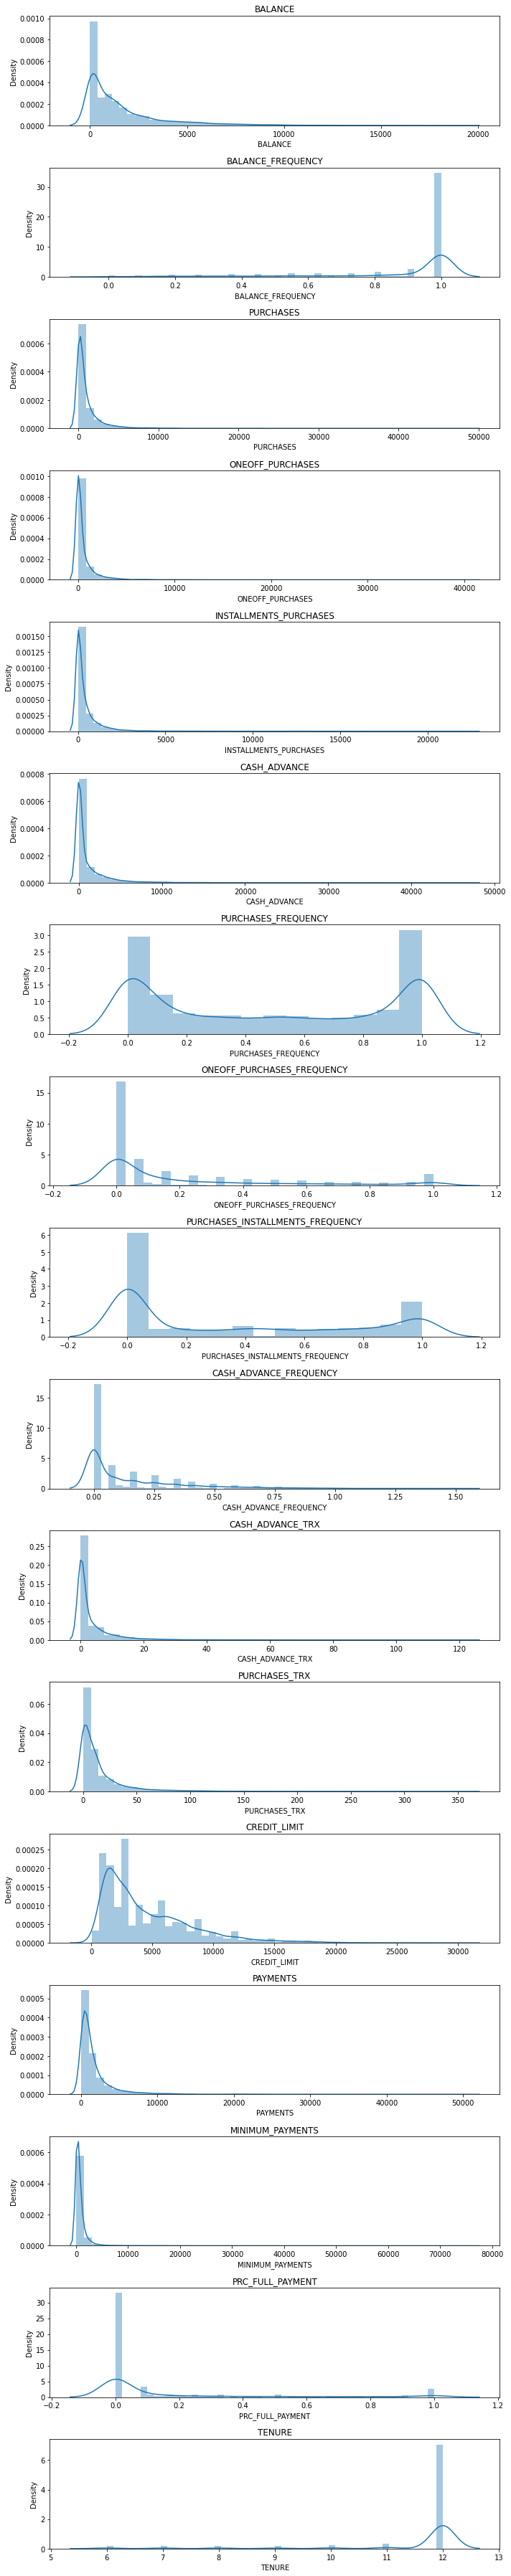

In [18]:
plt.figure(figsize=(10,50))
for i in range(len(creditcard_df.columns)):
  plt.subplot(17,1, i + 1)
  sns.distplot(creditcard_df[creditcard_df.columns[i]], kde=True);
  plt.title(creditcard_df.columns[i])
plt.tight_layout();

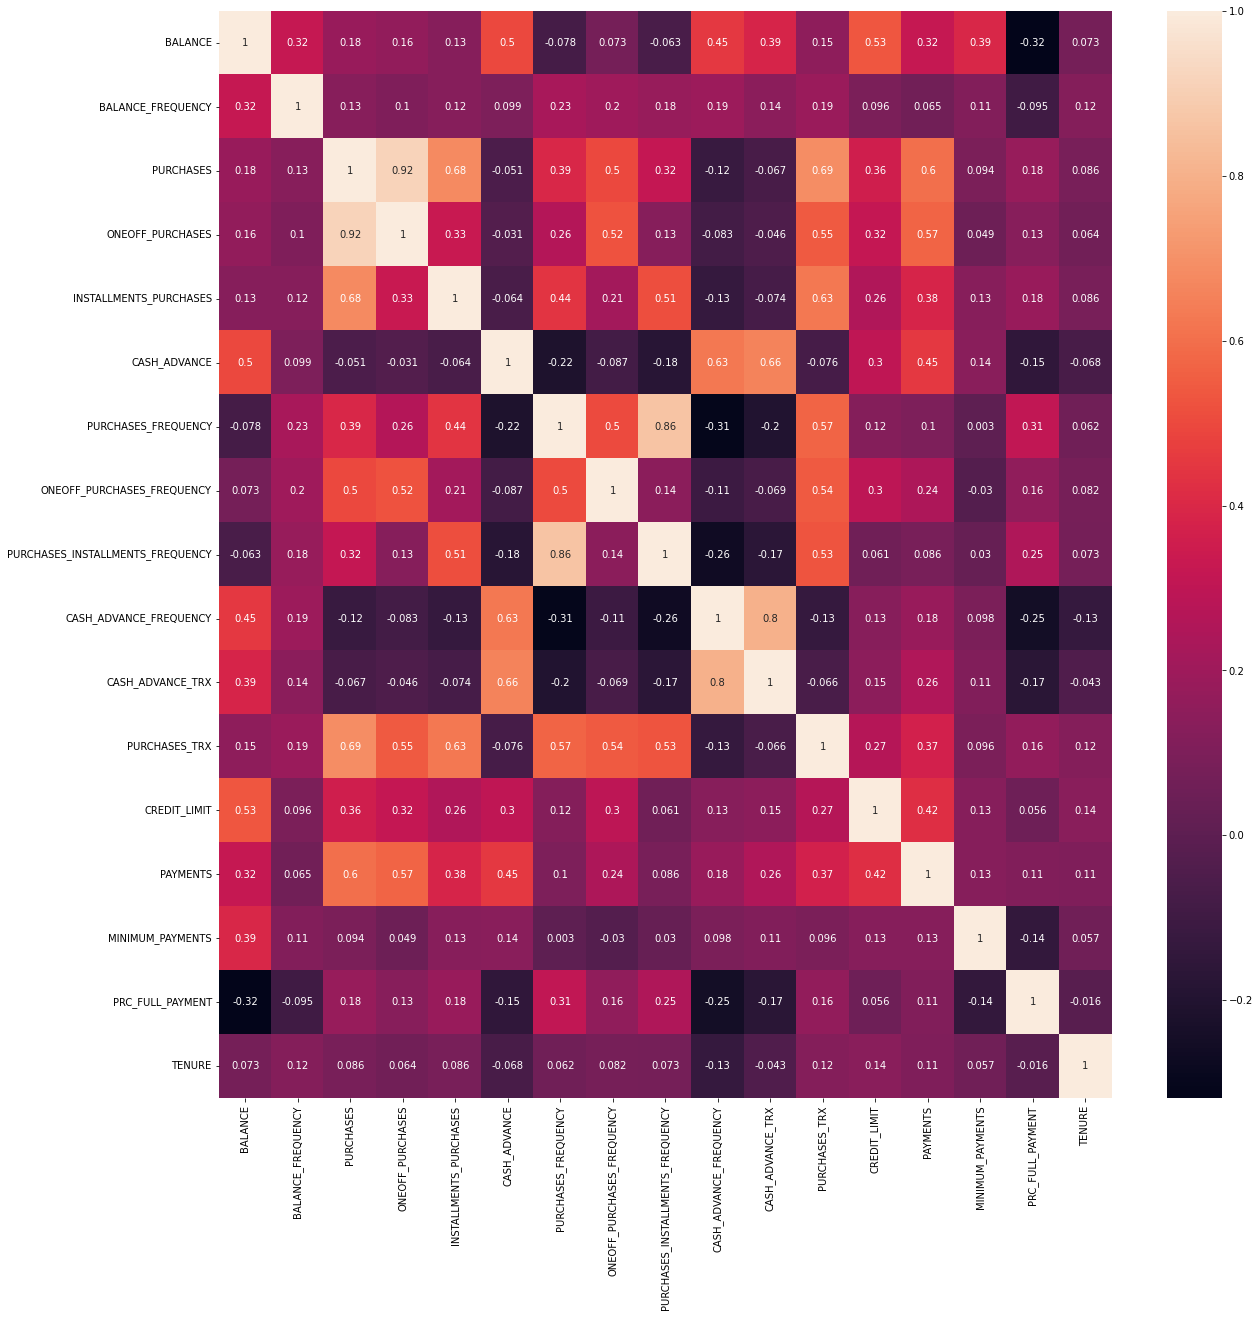

In [19]:
correlations = creditcard_df.corr()
f, ax = plt.subplots(figsize=(20,20))
sns.heatmap(correlations, annot=True);

## Definição do número de clusters usando o Elbow Method

In [20]:
min(creditcard_df['BALANCE']), max(creditcard_df['BALANCE'])

(0.0, 19043.13856)

In [21]:
scaler = StandardScaler()
creditcard_df_scaled = scaler.fit_transform(creditcard_df)

In [22]:
min(creditcard_df_scaled[0]), max(creditcard_df_scaled[0])

(-0.9604333444542572, 0.36067954425377496)

In [23]:
creditcard_df_scaled

array([[-0.73198937, -0.24943448, -0.42489974, ..., -0.31096755,
        -0.52555097,  0.36067954],
       [ 0.78696085,  0.13432467, -0.46955188, ...,  0.08931021,
         0.2342269 ,  0.36067954],
       [ 0.44713513,  0.51808382, -0.10766823, ..., -0.10166318,
        -0.52555097,  0.36067954],
       ...,
       [-0.7403981 , -0.18547673, -0.40196519, ..., -0.33546549,
         0.32919999, -4.12276757],
       [-0.74517423, -0.18547673, -0.46955188, ..., -0.34690648,
         0.32919999, -4.12276757],
       [-0.57257511, -0.88903307,  0.04214581, ..., -0.33294642,
        -0.52555097, -4.12276757]])

In [24]:
wcss_1 = []
range_values = range(1,20)
for i in range_values:
  kmeans = KMeans(n_clusters=i)
  kmeans.fit(creditcard_df_scaled)
  wcss_1.append(kmeans.inertia_)

In [25]:
print(wcss_1)

[152149.99999999983, 127784.97295116563, 111986.64440741186, 99073.93826774803, 91503.39081843363, 85776.95223269562, 79532.4097382905, 74509.2960952288, 69831.5133527806, 66450.72037277269, 63633.114866463584, 61357.924030162874, 59175.84191072936, 57494.12562046603, 55860.82139237455, 54268.91290453749, 53293.19037508887, 51957.23085684609, 51024.71749643401]


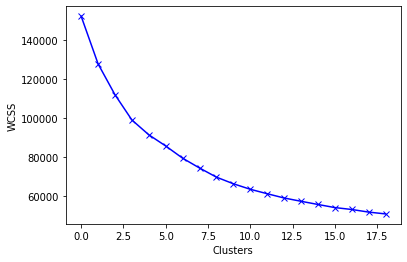

In [26]:
plt.plot(wcss_1, 'bx-')
plt.xlabel('Clusters')
plt.ylabel('WCSS');

## Agrupamento com k-means

In [28]:
kmeans = KMeans(n_clusters=8)
kmeans.fit(creditcard_df_scaled)
labels = kmeans.labels_

In [30]:
labels, len(labels)

(array([2, 5, 1, ..., 7, 7, 7], dtype=int32), 8950)

In [31]:
np.unique(labels, return_counts=True)

(array([0, 1, 2, 3, 4, 5, 6, 7], dtype=int32),
 array([2016, 1126, 2771, 1185,  327,  877,   23,  625]))

In [32]:
kmeans.cluster_centers_

array([[-3.61063437e-01,  3.31481301e-01, -3.03984714e-02,
        -2.40526396e-01,  3.69816712e-01, -3.62616453e-01,
         9.95820694e-01, -3.80261217e-01,  1.20685864e+00,
        -4.71902654e-01, -3.59698784e-01,  1.93991918e-01,
        -2.57175385e-01, -2.13419288e-01, -5.08331383e-02,
         3.16544610e-01,  2.55413425e-01],
       [-1.16560506e-01,  4.02904031e-01,  5.80864213e-01,
         7.04435032e-01,  7.90758265e-02, -3.31857810e-01,
         9.98400695e-01,  1.91565866e+00,  2.13178800e-01,
        -4.16853526e-01, -3.32654452e-01,  6.66905196e-01,
         4.64952748e-01,  1.72523157e-01, -1.54926228e-01,
         4.58577869e-01,  2.75147945e-01],
       [ 1.06061658e-02,  4.05019587e-01, -3.54307727e-01,
        -2.38911249e-01, -3.98724668e-01, -9.88854821e-02,
        -8.41618846e-01, -3.83298766e-01, -7.51223211e-01,
         9.44570318e-02, -3.50871347e-02, -4.77780538e-01,
        -3.04933852e-01, -2.51792056e-01, -7.99843259e-03,
        -4.55201627e-01,  2.7

In [34]:
cluster_centers = pd.DataFrame(data=kmeans.cluster_centers_, columns=[creditcard_df.columns])
cluster_centers

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,-0.361063,0.331481,-0.030398,-0.240526,0.369817,-0.362616,0.995821,-0.380261,1.206859,-0.471903,-0.359699,0.193992,-0.257175,-0.213419,-0.050833,0.316545,0.255413
1,-0.116561,0.402904,0.580864,0.704435,0.079076,-0.331858,0.998401,1.915659,0.213179,-0.416854,-0.332654,0.666905,0.464953,0.172523,-0.154926,0.458578,0.275148
2,0.010606,0.405020,-0.354308,-0.238911,-0.398725,-0.098885,-0.841619,-0.383299,-0.751223,0.094457,-0.035087,-0.477781,-0.304934,-0.251792,-0.007998,-0.455202,0.273847
3,-0.700928,-2.138065,-0.309875,-0.234351,-0.302036,-0.322516,-0.553674,-0.440210,-0.439588,-0.521496,-0.376524,-0.418513,-0.175016,-0.202031,-0.256786,0.281800,0.199250
4,1.111629,0.475588,2.574618,1.841174,2.705203,-0.124748,1.170103,1.550721,1.293808,-0.267993,-0.125462,3.227958,1.334441,1.517036,0.812277,0.239901,0.335466
5,1.669404,0.390095,-0.221249,-0.157449,-0.233946,2.006144,-0.482682,-0.212973,-0.422983,1.918998,1.925983,-0.271367,1.015509,0.816635,0.507443,-0.390751,0.071837
6,1.865907,0.332878,12.596844,13.111182,5.696389,-0.004178,1.033322,2.170634,0.866221,-0.476183,-0.214854,4.566558,3.174197,8.991136,1.064817,1.236317,0.295702
7,-0.334235,-0.345364,-0.287007,-0.212744,-0.287412,0.068171,-0.202320,-0.283605,-0.226363,0.308382,0.000348,-0.387485,-0.562891,-0.391355,-0.209255,0.013610,-3.198580


In [35]:
cluster_centers = scaler.inverse_transform(cluster_centers)
cluster_centers = pd.DataFrame(data=cluster_centers, columns=[creditcard_df.columns])
cluster_centers

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,812.951761,0.955796,938.258031,193.212817,745.488309,218.447471,0.890022,0.089018,0.844074,0.040712,0.794147,19.531746,3558.740180,1115.315926,745.742058,0.246299,11.859127
1,1321.863974,0.972715,2244.230177,1761.655244,482.574933,282.949782,0.891057,0.773936,0.449160,0.051728,0.978705,31.286602,6186.137775,2232.581487,503.157503,0.287841,11.885537
2,1586.550667,0.973216,246.220913,195.893630,50.505875,771.503637,0.152568,0.088112,0.065882,0.154046,3.009383,2.833995,3384.975340,1004.230521,845.566533,0.020576,11.883796
3,105.552739,0.370783,341.151561,203.462143,137.939882,302.539864,0.268134,0.071134,0.189734,0.030788,0.679325,4.307173,3857.670417,1148.284840,265.777795,0.236136,11.783966
4,3878.236086,0.989933,6503.916748,3648.408282,2857.348957,717.267904,0.959969,0.665068,0.878630,0.081516,2.392638,94.944785,9349.693252,6124.815035,2757.183783,0.223882,11.966258
5,5039.198156,0.969681,530.502543,331.104880,199.513592,5185.849543,0.296627,0.138924,0.196333,0.519155,16.392246,7.964652,8189.286825,4097.222532,2046.782053,0.039427,11.613455
6,5448.201718,0.956126,27916.555652,22354.314348,5562.241304,970.110470,0.905072,0.850000,0.708696,0.039855,1.782609,128.217391,16043.478261,27761.600386,3345.718254,0.515316,11.913043
7,868.793568,0.795457,390.010464,239.326032,151.164432,1121.829931,0.409150,0.117853,0.274475,0.196855,3.251200,5.078400,2446.423119,600.208404,376.545946,0.157695,7.236800


[Análise dos grupos]

In [42]:
creditcard_df_cluster = pd.concat([creditcard_df, pd.DataFrame({'cluster':labels})], axis=1)
creditcard_df_cluster.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,cluster
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12,2
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12,5
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12,1
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,12,2
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12,2


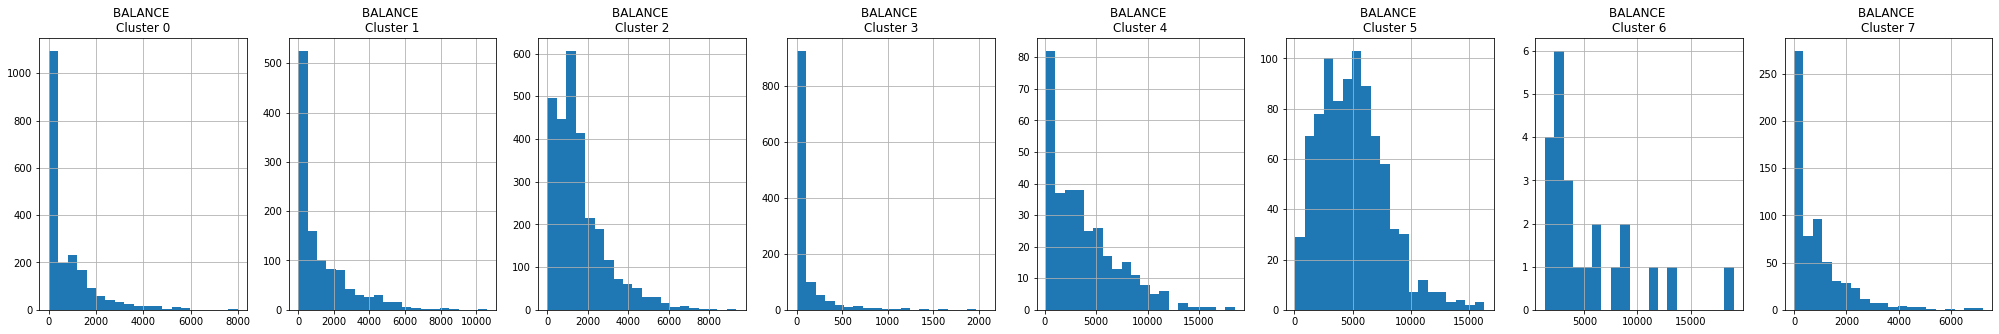

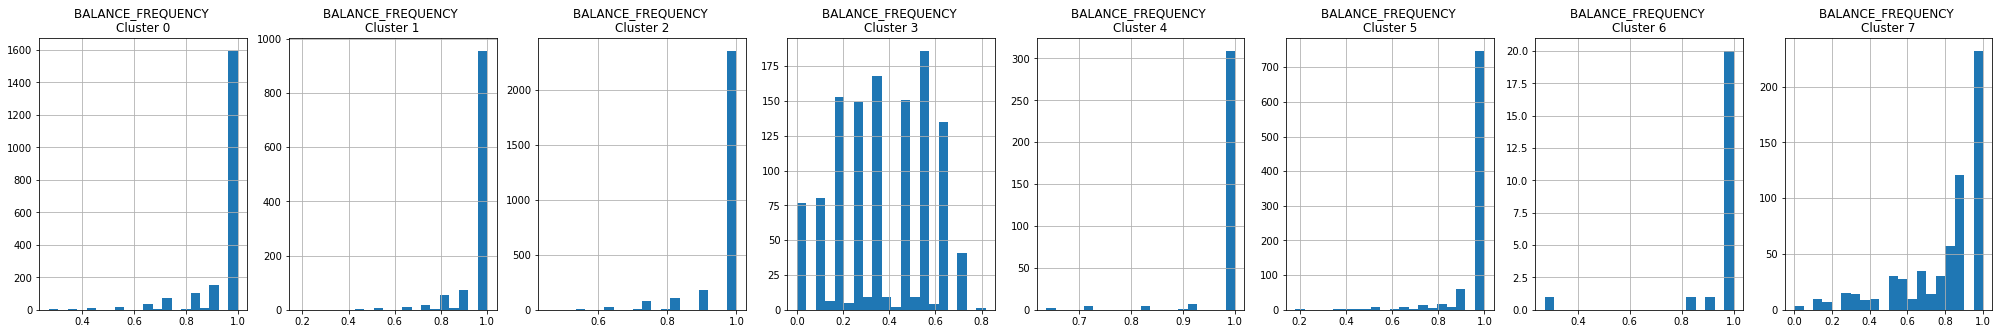

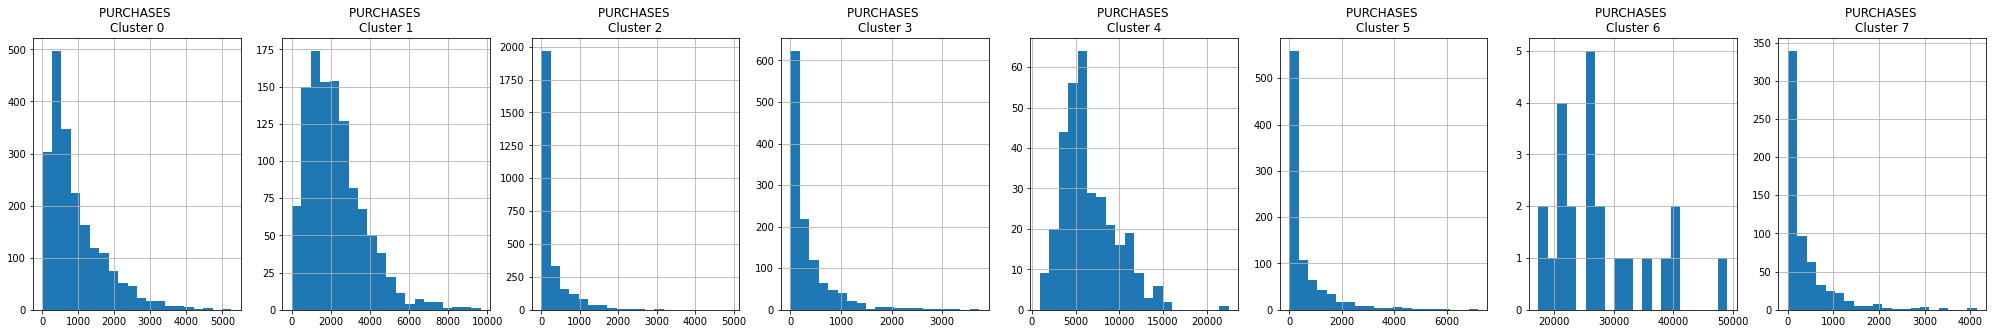

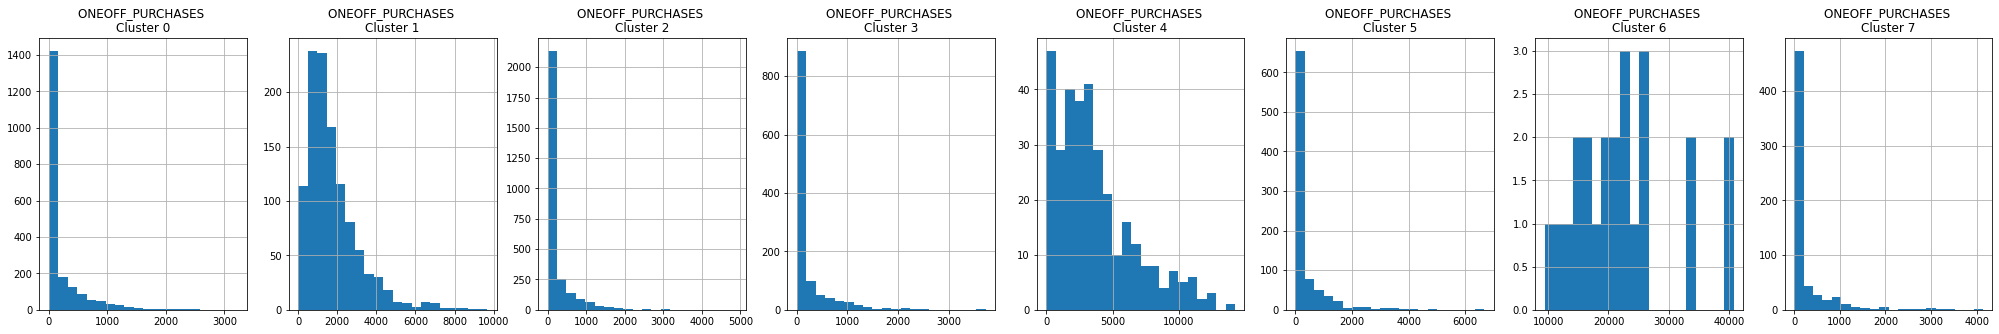

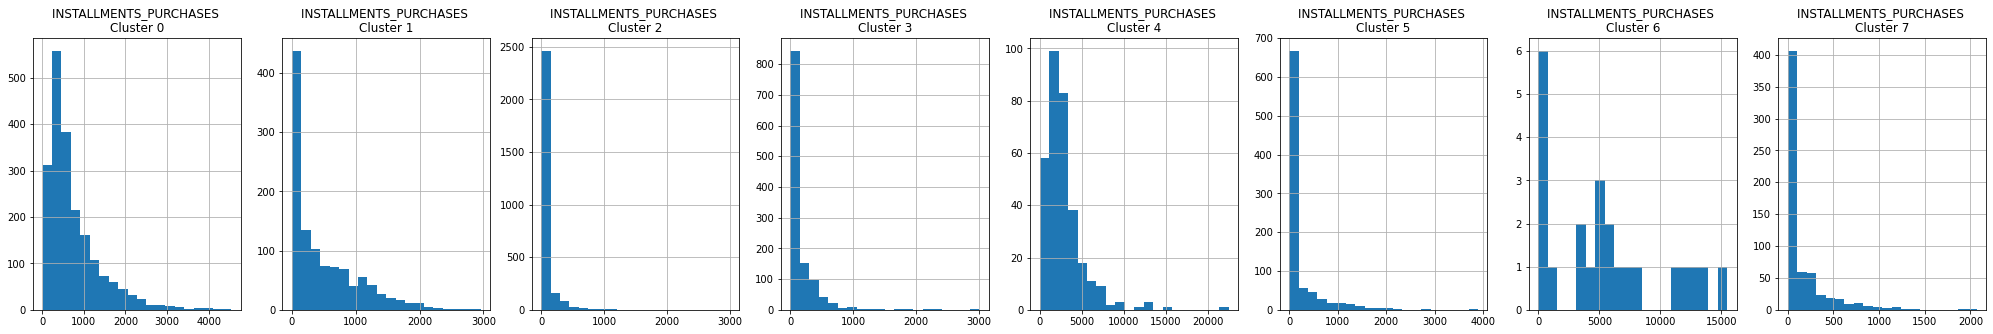

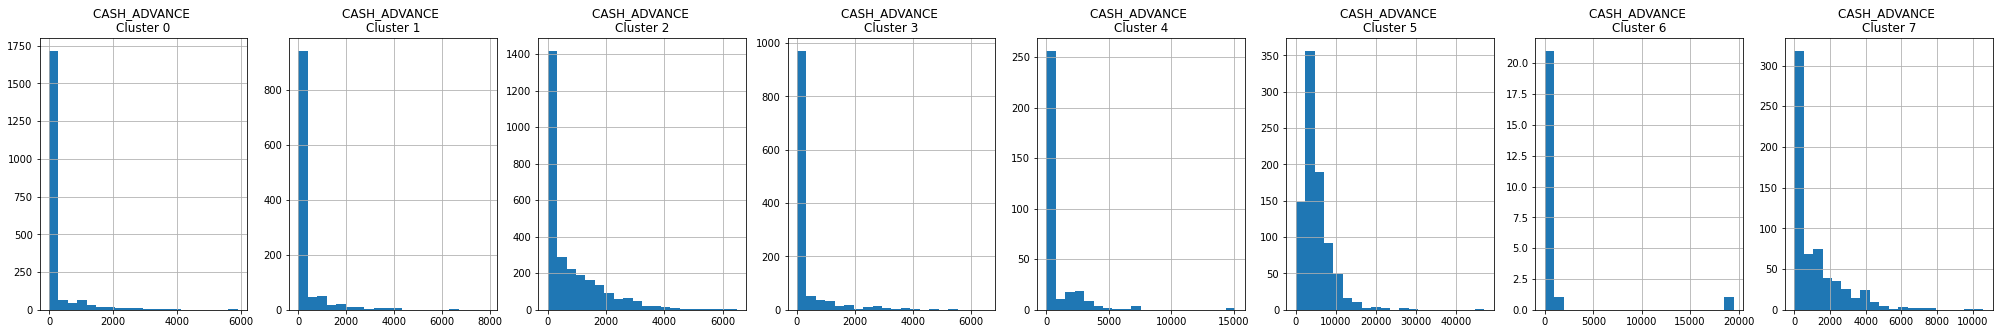

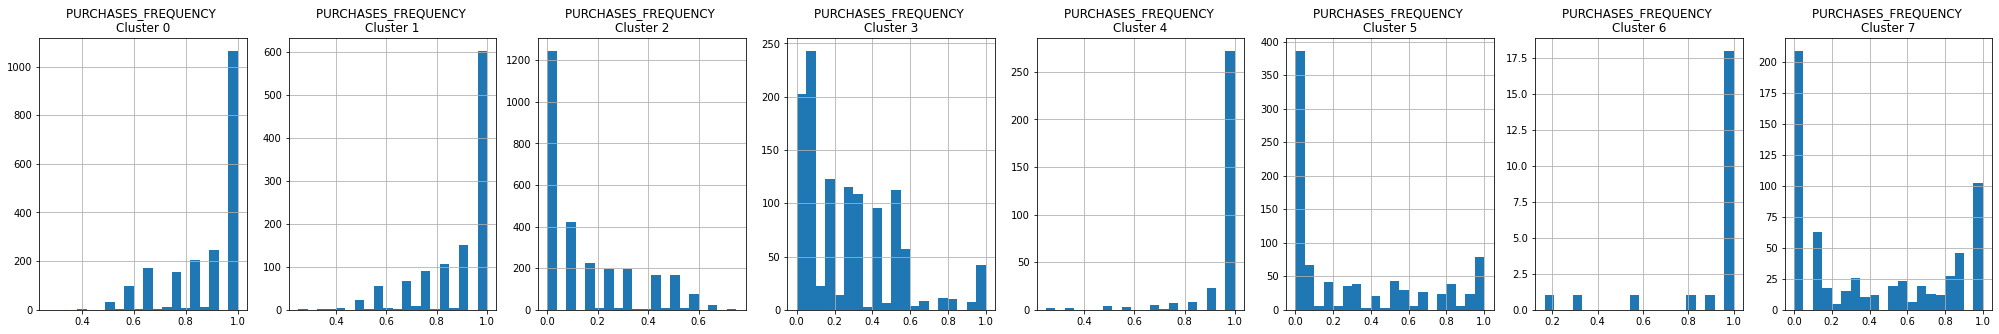

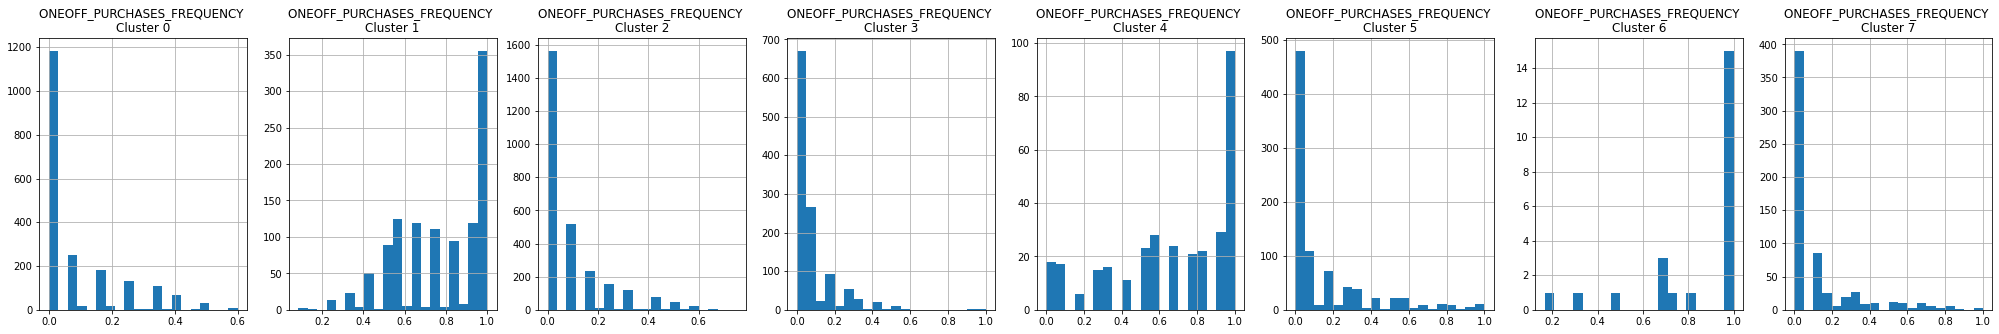

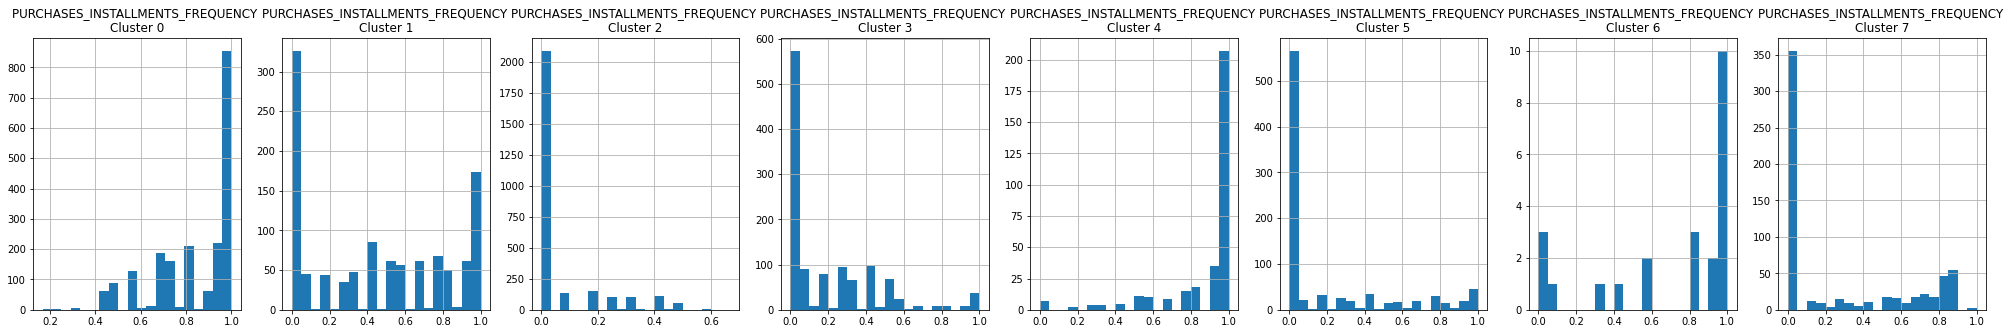

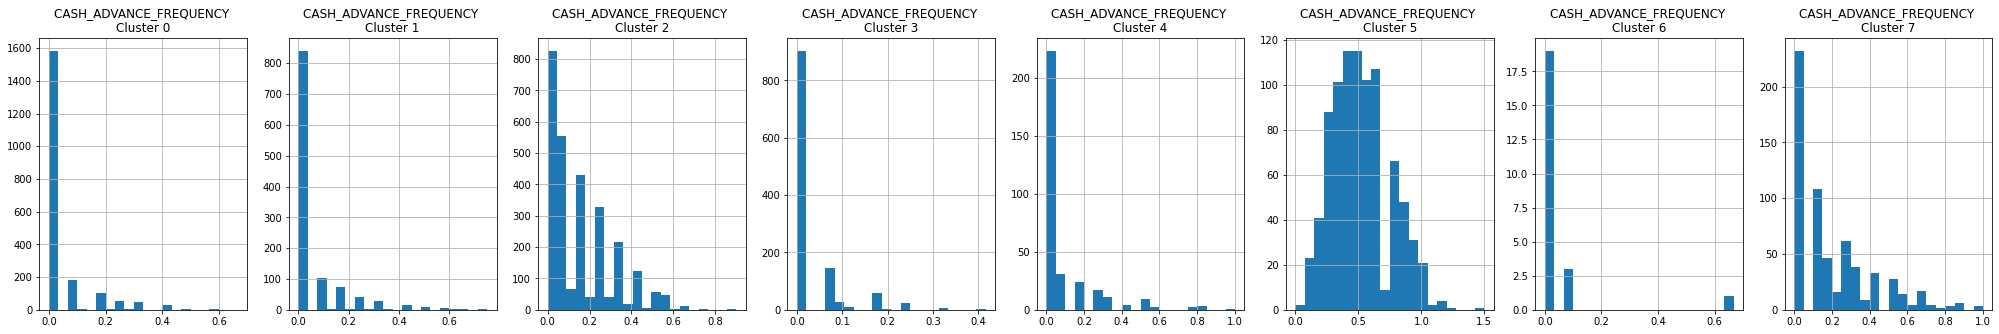

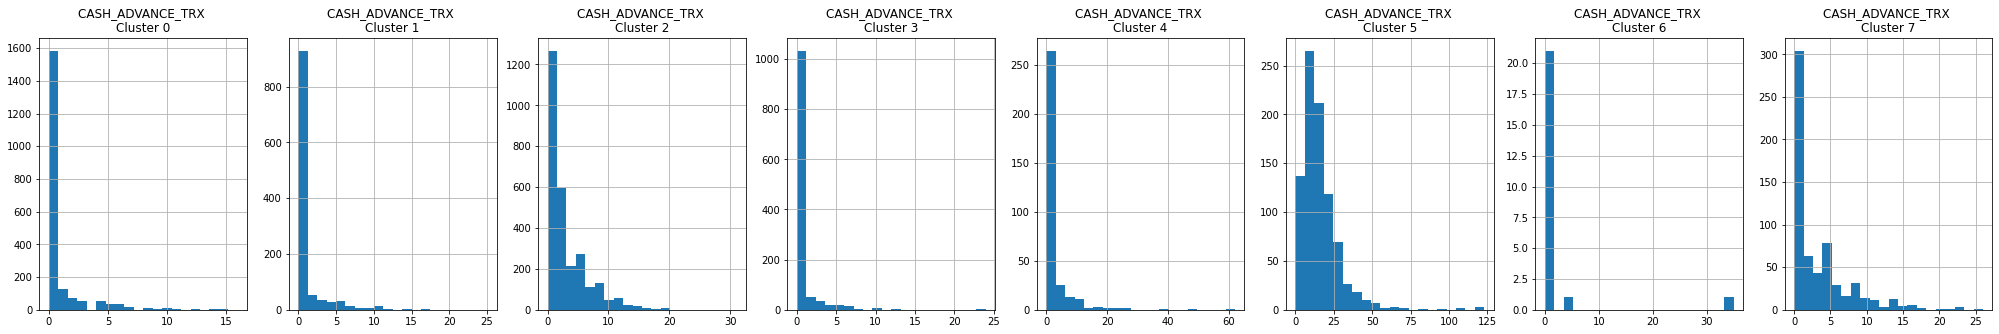

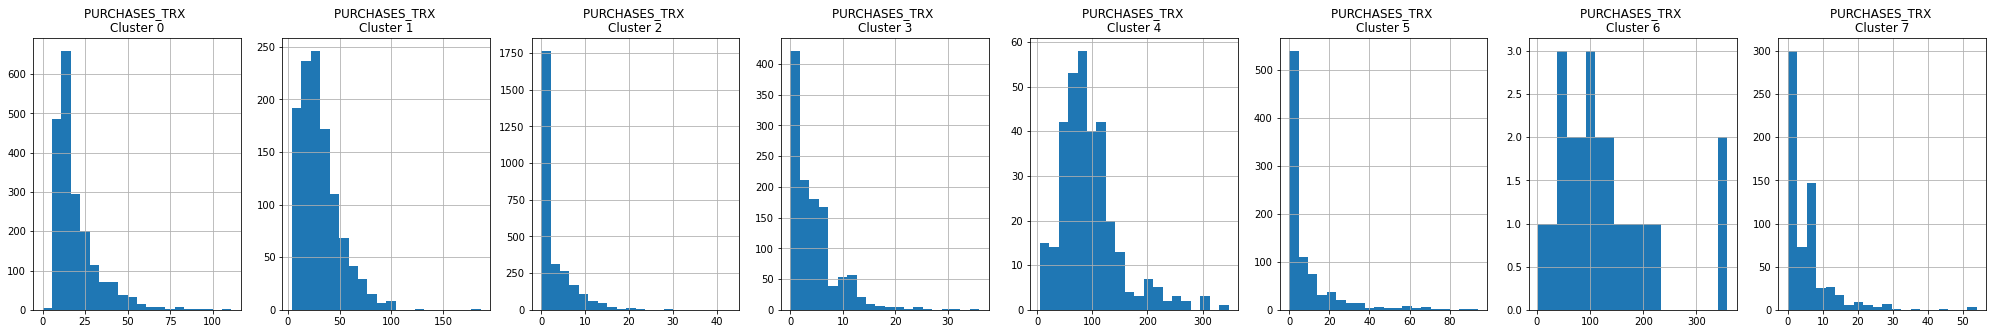

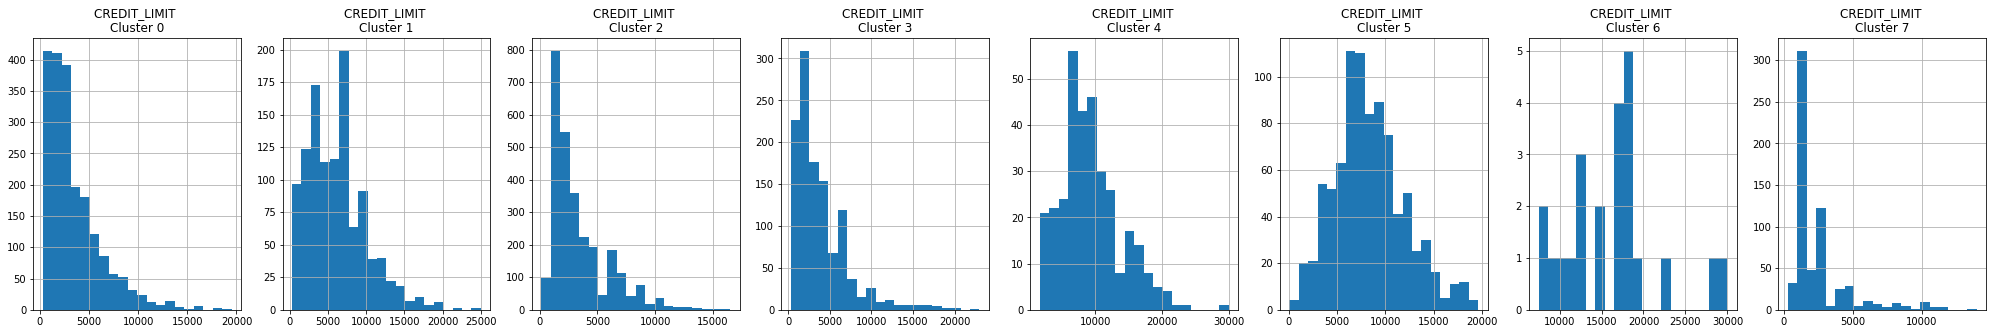

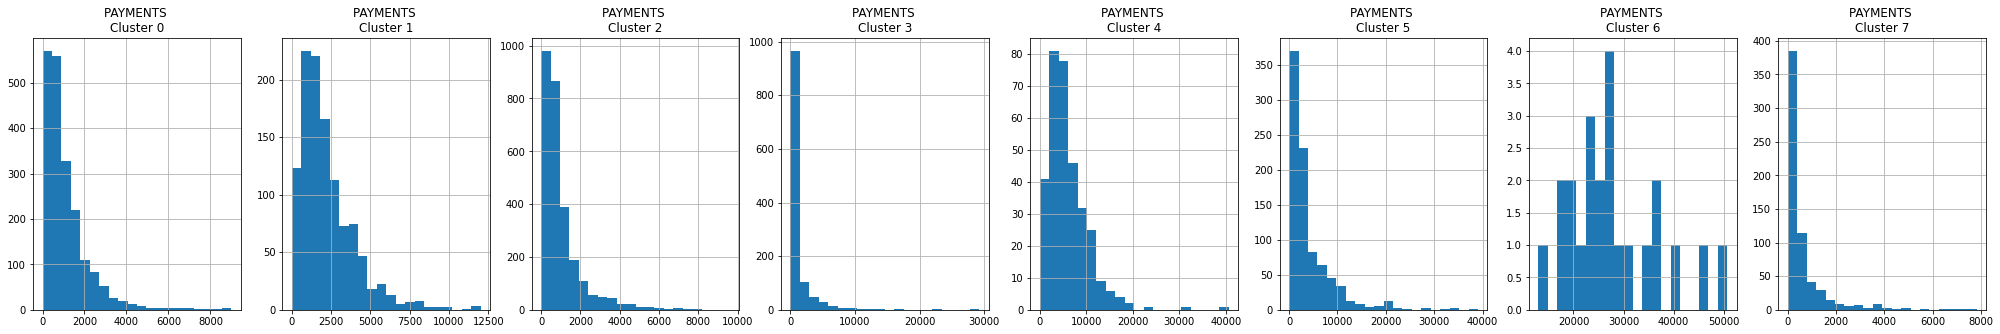

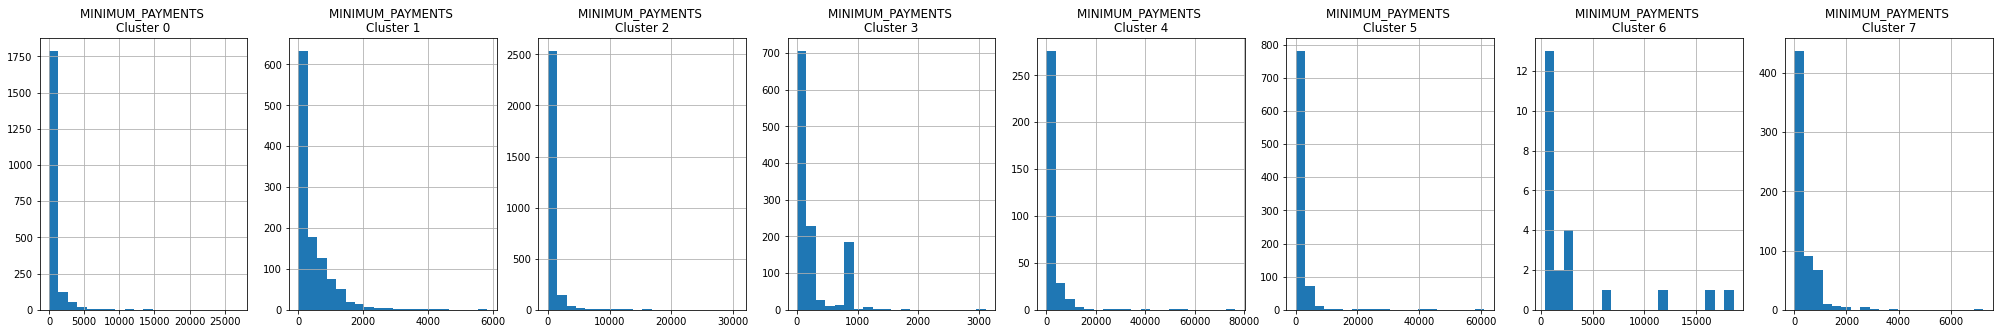

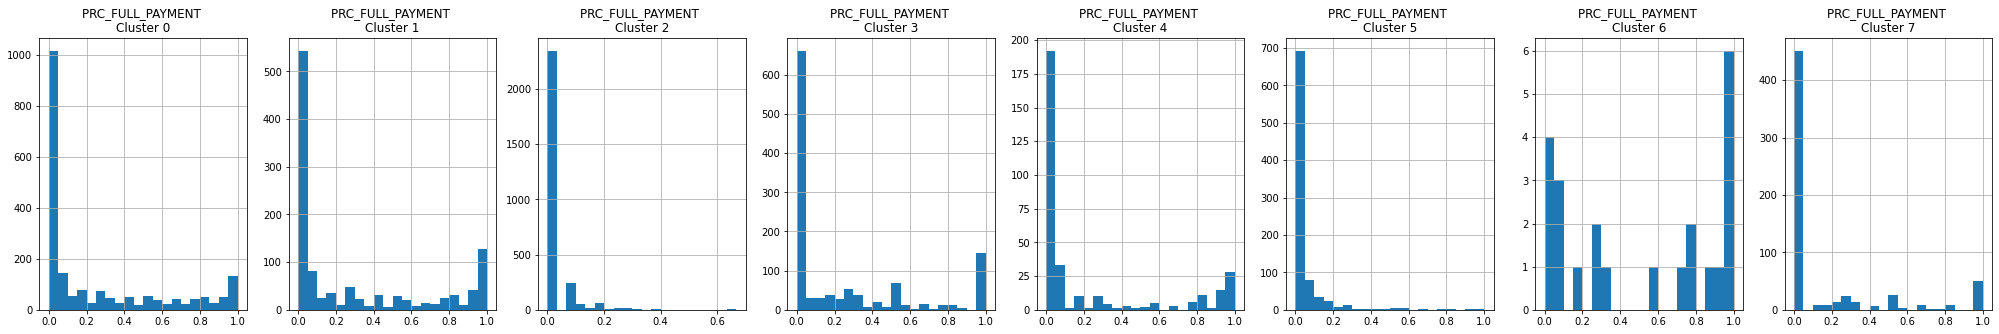

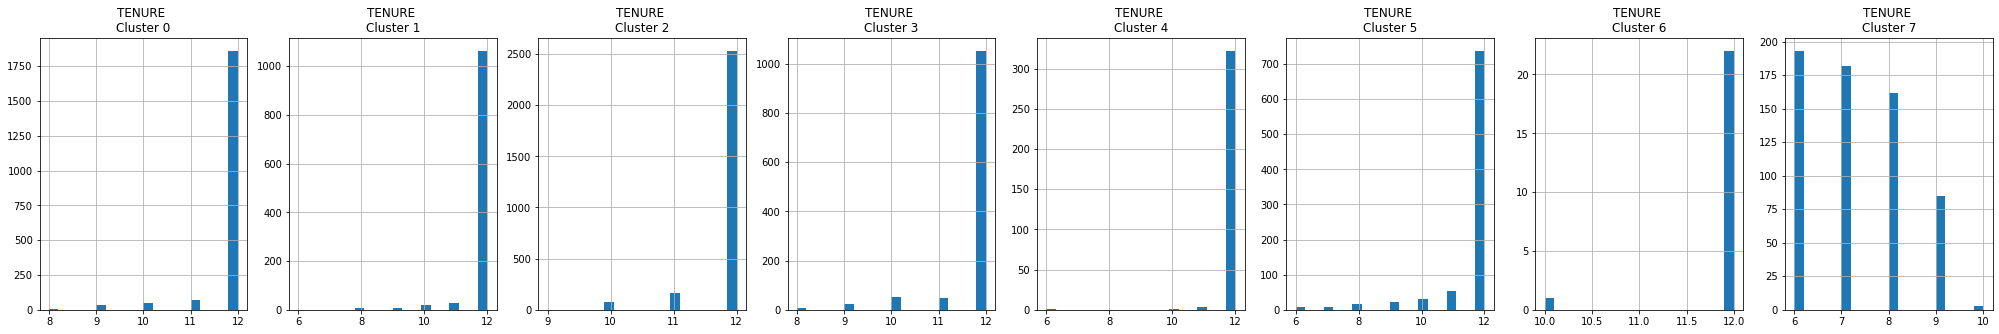

In [43]:
for i in creditcard_df.columns:
  plt.figure(figsize=(35,5))
  for j in range(8):
    plt.subplot(1, 8, j+1)
    cluster = creditcard_df_cluster[creditcard_df_cluster['cluster'] == j]
    cluster[i].hist(bins=20)
    plt.title('{} \nCluster {}'.format(i, j))
  plt.show()

In [44]:
credit_ordered = creditcard_df_cluster.sort_values(by='cluster')
credit_ordered.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,cluster
2244,2382.328208,1.000000,899.58,413.28,486.30,450.252732,1.000000,0.250000,1.000000,0.166667,4,34,2500.0,850.186851,1212.047288,0.000000,12,0
6893,2135.744209,1.000000,1342.31,241.75,1100.56,1993.285912,0.583333,0.166667,0.583333,0.250000,8,23,8000.0,5720.735722,513.579640,0.083333,12,0
6890,31.475251,1.000000,479.96,0.00,479.96,0.000000,1.000000,0.000000,1.000000,0.000000,0,35,2500.0,431.591387,176.765922,1.000000,12,0
2004,1418.215497,1.000000,1003.95,408.83,595.12,0.000000,0.583333,0.166667,0.500000,0.000000,0,15,11000.0,2218.323066,454.602396,0.000000,12,0
6888,93.977513,0.909091,389.44,0.00,389.44,0.000000,0.727273,0.000000,0.727273,0.000000,0,8,2500.0,455.962105,114.634795,0.200000,11,0


In [45]:
credit_ordered.tail()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,cluster
5931,170.019011,0.500000,266.60,266.60,0.0,1199.729121,0.166667,0.166667,0.0,0.166667,3,1,2500.0,293.055707,88.589314,0.0,6,7
8264,385.845093,0.250000,0.00,0.00,0.0,2397.763368,0.000000,0.000000,0.0,0.250000,5,0,2500.0,0.000000,864.206542,0.0,8,7
5914,912.912728,0.857143,0.00,0.00,0.0,1563.920556,0.000000,0.000000,0.0,0.285714,9,0,1500.0,212.084925,331.487123,0.0,7,7
8243,792.349098,0.555556,0.00,0.00,0.0,1795.077768,0.000000,0.000000,0.0,0.444444,13,0,2000.0,219.603033,286.451636,0.0,9,7
8949,372.708075,0.666667,1093.25,1093.25,0.0,127.040008,0.666667,0.666667,0.0,0.333333,2,23,1200.0,63.165404,88.288956,0.0,6,7


In [46]:
credit_ordered.to_csv('cluster.csv')

## Aplicação de PCA (principal component analysis) e visualização dos resultados

In [48]:
pca = PCA(n_components=2)
principal_comp = pca.fit_transform(creditcard_df_scaled)
principal_comp

array([[-1.68222067, -1.0764524 ],
       [-1.13829583,  2.50647933],
       [ 0.96968575, -0.38350531],
       ...,
       [-0.92620389, -1.81079054],
       [-2.3365523 , -0.65797625],
       [-0.55642125, -0.40046375]])

In [49]:
pca_df = pd.DataFrame(data=principal_comp, columns=['pca1', 'pca2'])
pca_df.head()

,pca1,pca2
0,-1.682221,-1.076452
1,-1.138296,2.506479
2,0.969686,-0.383505
3,-0.873628,0.043166
4,-1.599434,-0.688583


In [50]:
pca_df = pd.concat([pca_df, pd.DataFrame({'cluster':labels})], axis=1)
pca_df.head()

,pca1,pca2,cluster
0,-1.682221,-1.076452,2
1,-1.138296,2.506479,5
2,0.969686,-0.383505,1
3,-0.873628,0.043166,2
4,-1.599434,-0.688583,2


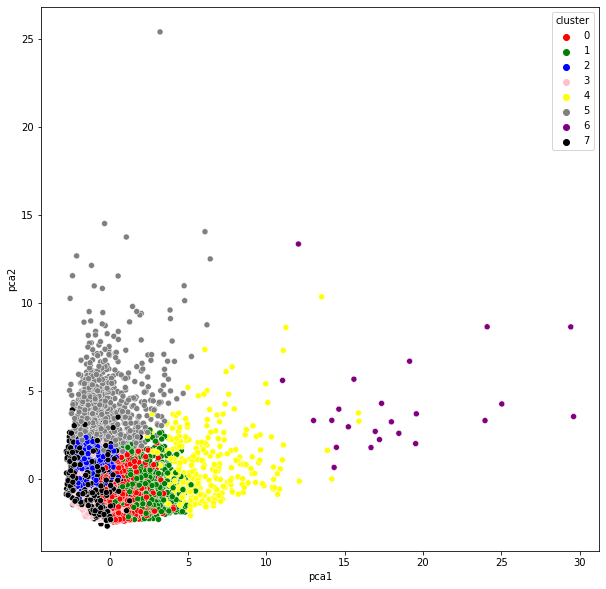

In [52]:
plt.figure(figsize=(10,10))
sns.scatterplot(x='pca1', y='pca2', hue='cluster', data=pca_df, palette=['red', 'green','blue', 'pink', 'yellow', 'gray', 'purple', 'black'])


## Aplicação de autoencoders

In [53]:
# 18-> 10
# Elbow
# K-means
# PCA

In [54]:
creditcard_df_scaled.shape

(8950, 17)

In [55]:
# 17 -> 500 -> 2000 -> 10 -> 500 -> 2000 -> 17
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model

In [56]:
input_df = Input(shape=(17,))
x = Dense(500, activation='relu')(input_df)
x = Dense(2000, activation='relu')(x)
encoded = Dense(10, activation='relu')(x)
x = Dense(2000, activation='relu')(encoded)
x = Dense(500, activation='relu')(x)
decoded = Dense(17)(x)


In [57]:
#autoencoder
autoencoder = Model(input_df, decoded)

In [58]:
#encoder
encoder = Model(input_df, encoded)

In [59]:
autoencoder.compile(optimizer='Adam', loss='mean_squared_error')

In [60]:
autoencoder.fit(creditcard_df_scaled,creditcard_df_scaled, epochs = 50 )

Epoch 1/50
280/280 [==============================] - 8s 24ms/step - loss: 0.2522
Epoch 2/50
280/280 [==============================] - 7s 24ms/step - loss: 0.1054
Epoch 3/50
280/280 [==============================] - 7s 24ms/step - loss: 0.0928
Epoch 4/50
280/280 [==============================] - 7s 24ms/step - loss: 0.0910
Epoch 5/50
280/280 [==============================] - 7s 24ms/step - loss: 0.0689
Epoch 6/50
280/280 [==============================] - 8s 29ms/step - loss: 0.0678
Epoch 7/50
280/280 [==============================] - 10s 35ms/step - loss: 0.0635
Epoch 8/50
280/280 [==============================] - 9s 34ms/step - loss: 0.0939
Epoch 9/50
280/280 [==============================] - 7s 24ms/step - loss: 0.0636
Epoch 10/50
280/280 [==============================] - 8s 28ms/step - loss: 0.0555
Epoch 11/50
280/280 [==============================] - 8s 30ms/step - loss: 0.0599
Epoch 12/50
280/280 [==============================] - 8s 27ms/step - loss: 0.0621
Epoch 13/50


In [61]:
creditcard_df_scaled.shape

(8950, 17)

In [62]:
compact = encoder.predict(creditcard_df_scaled)

In [63]:
compact.shape

(8950, 10)

In [65]:
# aplicação do Elbow
wcss_2 = []
range_values = range(1,20)
for i in range_values:
  kmeans = KMeans(n_clusters=i)
  kmeans.fit(compact)
  wcss_2.append(kmeans.inertia_)

Text(0, 0.5, 'WCSS')

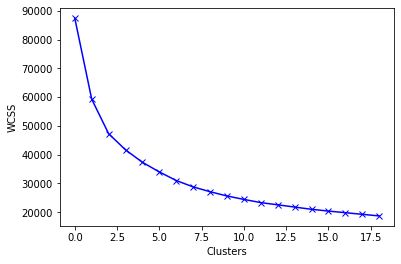

In [66]:
plt.plot(wcss_2, 'bx-')
plt.xlabel('Clusters')
plt.ylabel('WCSS')


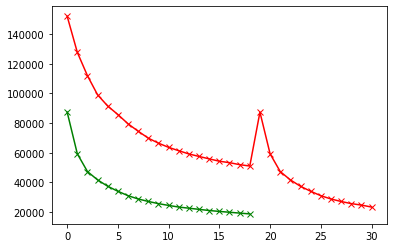

In [67]:
plt.plot(wcss_1, 'bx-', color='r')
plt.plot(wcss_2, 'bx-', color='g')

In [68]:
kmeans = KMeans(n_clusters=4)
kmeans.fit(compact)

KMeans(n_clusters=4)

In [69]:
labels = kmeans.labels_
labels, labels.shape

(array([0, 1, 0, ..., 1, 1, 1], dtype=int32), (8950,))

In [70]:
df_cluster_at = pd.concat([creditcard_df, pd.DataFrame({'cluster':labels})], axis=1)
df_cluster_at.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,cluster
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12,0
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12,1
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12,0
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,12,0
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12,0


In [71]:
pca = PCA(n_components=2)
prin_comp = pca.fit_transform(compact)
pca_df = pd.DataFrame(data=prin_comp, columns=['pca1', 'pca2'])
pca_df.head()

,pca1,pca2
0,-1.487934,-0.292485
1,2.537044,-1.005581
2,-2.296946,0.479369
3,-0.733686,0.232542
4,-1.615096,-0.110219


In [75]:
pca_df = pd.concat([pca_df, pd.DataFrame({'cluster':labels})], axis = 1)
pca_df.head()

,pca1,pca2,0,cluster
0,-1.487934,-0.292485,cluster,0
1,2.537044,-1.005581,NaN,1
2,-2.296946,0.479369,NaN,0
3,-0.733686,0.232542,NaN,0
4,-1.615096,-0.110219,NaN,0


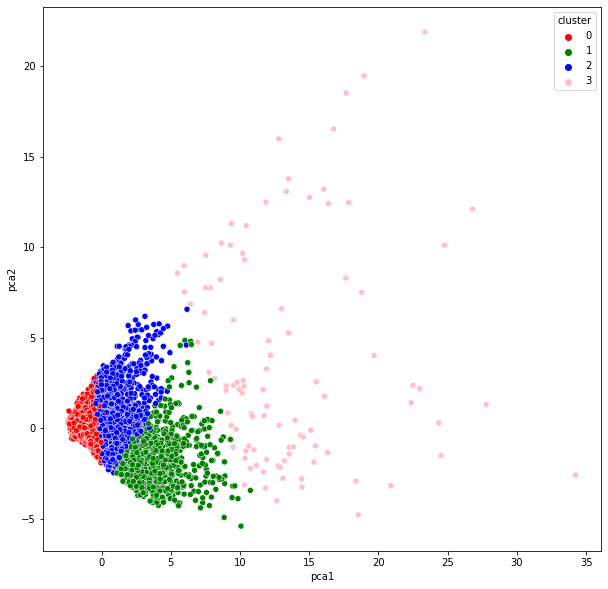

In [76]:
plt.figure(figsize=(10,10))
sns.scatterplot(x='pca1', y='pca2', hue='cluster', data=pca_df, palette=['red', 'green','blue', 'pink'])

In [77]:
df_cluster_ordered = df_cluster_at.sort_values(by='cluster')
df_cluster_ordered.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,cluster
0,40.900749,0.818182,95.40,0.0,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.0,12,0
5241,1158.013150,1.000000,170.00,170.0,0.00,299.899190,0.083333,0.083333,0.000000,0.250000,3,1,1200.0,525.816276,616.813089,0.0,12,0
5239,690.625555,1.000000,666.60,0.0,666.60,0.000000,1.000000,0.000000,1.000000,0.000000,0,12,6000.0,1130.376548,170.144183,0.0,12,0
5238,3830.603522,1.000000,1257.16,841.0,416.16,2929.077889,1.000000,0.083333,0.916667,0.166667,4,26,7500.0,887.037084,1014.663188,0.0,12,0
5237,2292.952733,1.000000,0.00,0.0,0.00,523.015459,0.000000,0.000000,0.000000,0.166667,2,0,2500.0,976.791650,724.561182,0.0,12,0


In [78]:
df_cluster_ordered.to_excel('cluster_ordered.xls')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  """Entry point for launching an IPython kernel.
